In [ ]:
import pandas as pd
path = 'https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true'
dados = pd.read_csv(path)

In [ ]:
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

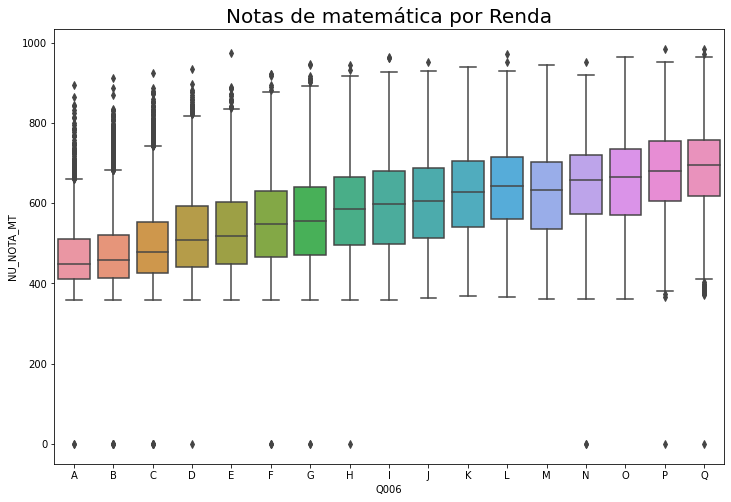

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Q006', y='NU_NOTA_MT', data=dados, order=sorted(dados['Q006'].unique()))
plt.title('Notas de matemática por Renda', fontdict = {'fontsize':20})
plt.show()

In [ ]:
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'NU_NOTA_MT']

In [ ]:
dados['NU_NOTA_TOTAL'] = dados[provas].sum(axis=1)

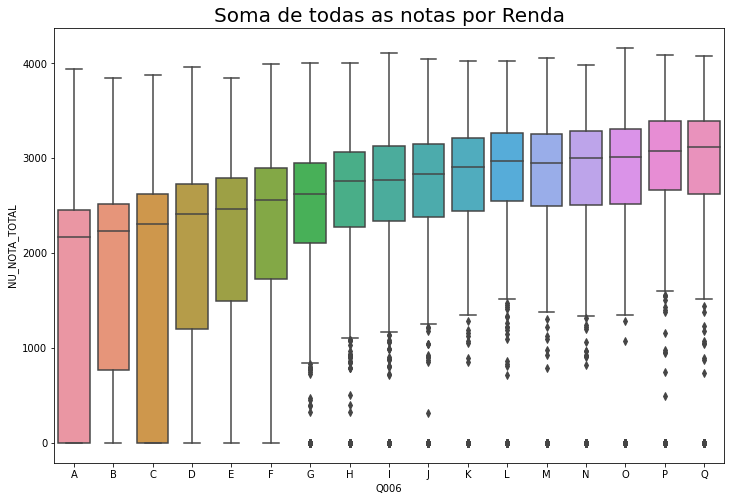

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Q006', y='NU_NOTA_TOTAL', data=dados, order=sorted(dados['Q006'].unique()))
plt.title('Soma de todas as notas por Renda', fontdict = {'fontsize':20})
plt.show()

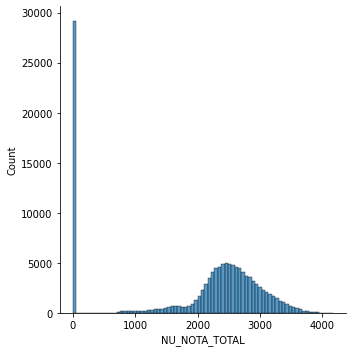

In [ ]:
sns.displot(dados, x='NU_NOTA_TOTAL')

In [ ]:
dados[dados['NU_NOTA_TOTAL'] == 0]

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
10,190001005028,2019,1506807,Santarém,15,PA,28,F,2,3,1,1506807.0,Santarém,15.0,PA,1,9,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,B,A,B,2,B,A,B,C,A,A,B,A,A,A,A,A,A,B,B,A,B,A,A,A,0.0
11,190001005057,2019,1501709,Bragança,15,PA,36,F,1,3,1,1501709.0,Bragança,15.0,PA,1,13,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,A,A,4,B,A,B,D,A,A,B,A,A,A,A,A,A,B,B,A,B,A,A,B,0.0
26,190001005484,2019,1504208,Marabá,15,PA,26,M,2,3,1,1721208.0,Tocantinópolis,17.0,TO,1,8,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,B,C,C,2,C,A,B,B,A,A,B,A,A,A,B,A,A,B,A,A,C,A,B,B,0.0
38,190001006086,2019,1508126,Ulianópolis,15,PA,29,F,1,3,1,2108108.0,Paulo Ramos,21.0,MA,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,A,A,5,C,A,B,C,A,B,B,A,A,A,A,A,A,B,B,A,C,A,A,B,0.0
40,190001006292,2019,1504422,Marituba,15,PA,24,M,1,1,1,1504422.0,Marituba,15.0,PA,1,5,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,F,B,6,G,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,D,A,A,B,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127351,190006118552,2019,2604106,Caruaru,26,PE,20,F,1,1,1,2604106.0,Caruaru,26.0,PE,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,D,B,5,H,A,C,D,B,A,B,B,B,A,B,A,A,D,A,A,E,A,B,B,0.0
127365,190006119756,2019,2302503,Brejo Santo,23,CE,22,F,1,3,1,2308104.0,Mauriti,23.0,CE,2,0,2,1.0,0,23169249.0,2302503.0,Brejo Santo,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,A,A,5,C,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,0.0
127366,190006119783,2019,2304400,Fortaleza,23,CE,27,F,1,3,1,2304400.0,Fortaleza,23.0,CE,2,0,2,NaN,0,23071460.0,2304400.0,Fortaleza,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,B,B,4,B,A,B,B,A,B,B,A,A,A,B,A,A,A,A,A,A,B,B,A,0.0
127368,190006119802,2019,2507507,João Pessoa,25,PB,18,M,1,2,1,2507507.0,João Pessoa,25.0,PB,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,F,A,A,5,C,A,C,E,B,A,B,A,A,A,A,A,B,B,A,A,C,A,A,B,0.0


In [ ]:
provas.append('NU_NOTA_TOTAL')

In [ ]:
dados_sem_notas_zero = dados[dados['NU_NOTA_TOTAL'] != 0]

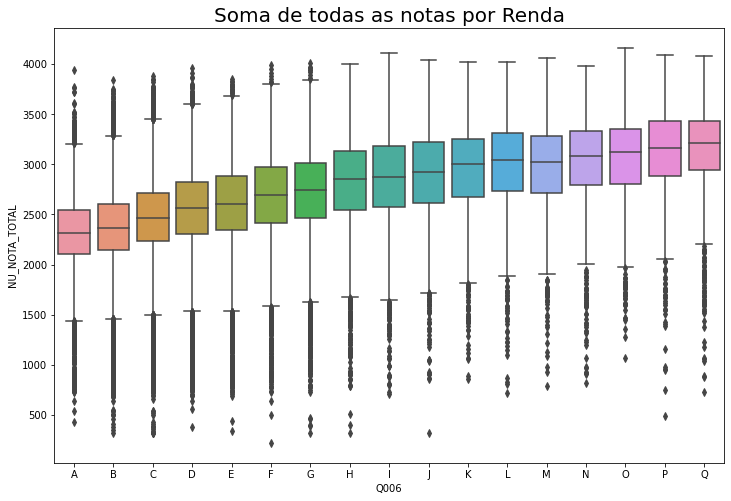

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Q006', y='NU_NOTA_TOTAL', data=dados_sem_notas_zero, order=sorted(dados['Q006'].unique()))
plt.title('Soma de todas as notas por Renda', fontdict = {'fontsize':20})
plt.show()

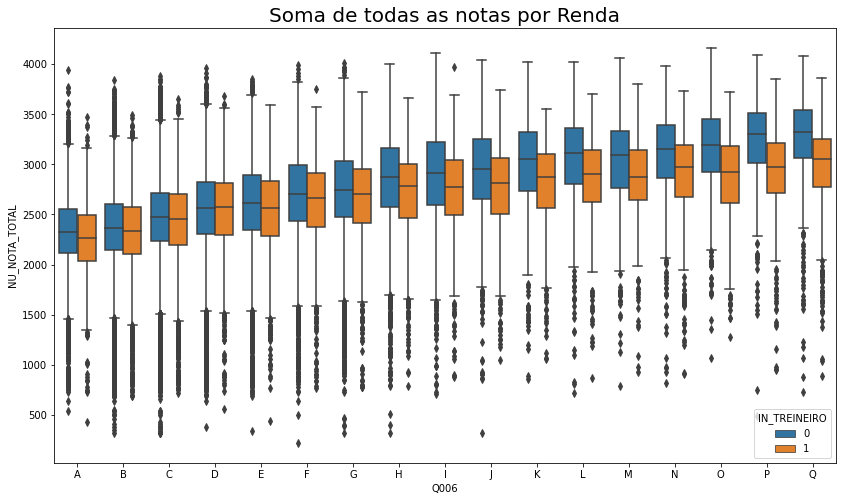

In [ ]:
plt.figure(figsize=(14,8))
sns.boxplot(x='Q006', y='NU_NOTA_TOTAL', data=dados_sem_notas_zero, hue = 'IN_TREINEIRO', order=sorted(dados['Q006'].unique()))
plt.title('Soma de todas as notas por Renda', fontdict = {'fontsize':20})
plt.show()

# DESAFIOS

### Mega desafio: Pegar a amostra completa dos alunos de 13 e 14 anos.

In [ ]:
dados1 = (pd.read_csv(path)[lambda x: x['NU_IDADE'] <= 14])

In [ ]:
len(dados1['NU_IDADE'])

145

### Desafio 01: Gráfico de frequência relativa dos alunos menores de idade por estado de residência.

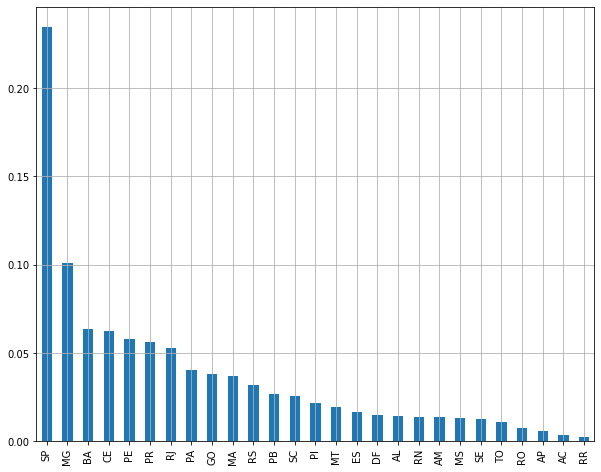

In [ ]:
plt.figure(figsize=(10,8))
dados[dados['NU_IDADE'] < 18]['SG_UF_RESIDENCIA'].value_counts(normalize=True).plot.bar(grid=True)
plt.show()

### Desafio 02: Criando função para plotar o boxplot do seaborn.

In [ ]:
def plot_bp(coluna):
  plt.figure(figsize=(12,8))
  sns.boxplot(x=coluna, y='NU_NOTA_TOTAL', data=dados, order=sorted(dados[coluna].unique()))
  plt.title('Soma de todas as notas por {}'.format(coluna.capitalize()), fontdict = {'fontsize':20})
  plt.show()

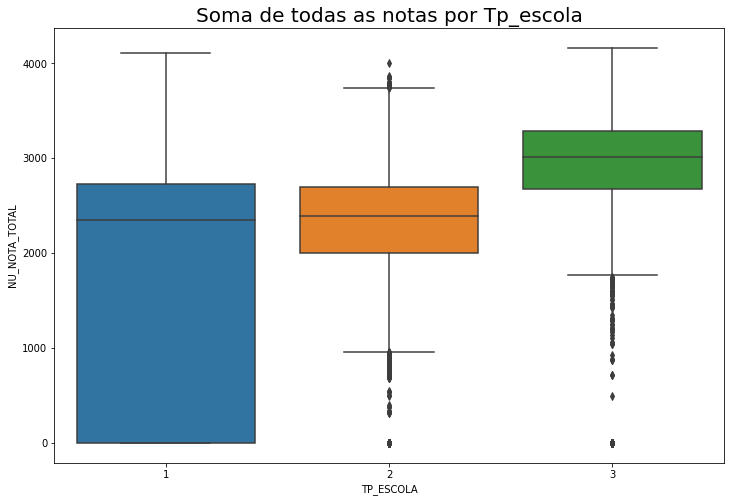

In [ ]:
plot_bp('TP_ESCOLA')

### Desafio 03: Verificar se quem zerou as provas foi eliminado ou faltou.

In [ ]:
def plot_bar_elim_faltou(col_nota, col_presenca):
  print(dados[dados[col_nota].isnull() | (dados[col_nota] == 0)][col_presenca].value_counts())
  plt.figure(figsize=(10,8))
  dados[dados[col_nota].isnull() | (dados[col_nota] == 0)][col_presenca].value_counts().plot.bar()

0    34570
2       52
1       18
Name: TP_PRESENCA_CN, dtype: int64


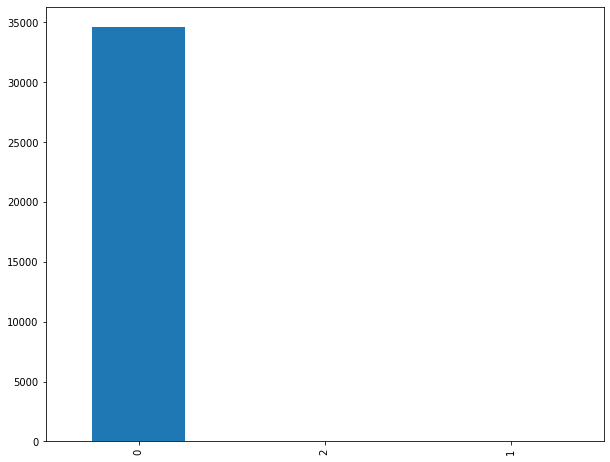

In [ ]:
plot_bar_elim_faltou('NU_NOTA_CN', 'TP_PRESENCA_CN')

### Desafio 04: Quem é eliminado tira NaN ou 0?

In [ ]:
dados[dados['TP_PRESENCA_CN'] == 2]['NU_NOTA_CN']

1784     NaN
2867     NaN
3411     NaN
5970     NaN
15619    NaN
16756    NaN
17035    NaN
24936    NaN
25454    NaN
27360    NaN
30042    NaN
36047    NaN
43694    NaN
44747    NaN
47088    NaN
49842    NaN
50943    NaN
55229    NaN
56242    NaN
58061    NaN
60225    NaN
61847    NaN
63315    NaN
63870    NaN
66579    NaN
68397    NaN
71474    NaN
71675    NaN
76027    NaN
77304    NaN
80839    NaN
81387    NaN
82582    NaN
84423    NaN
87083    NaN
87463    NaN
87789    NaN
91603    NaN
92473    NaN
93482    NaN
93997    NaN
95701    NaN
97725    NaN
98816    NaN
100003   NaN
110289   NaN
114896   NaN
117935   NaN
119045   NaN
120233   NaN
122716   NaN
125503   NaN
Name: NU_NOTA_CN, dtype: float64

### Desafio 05: Verificar a proporção dos participantes de rendas mais altas e baixas com treineiro e não treineiro.

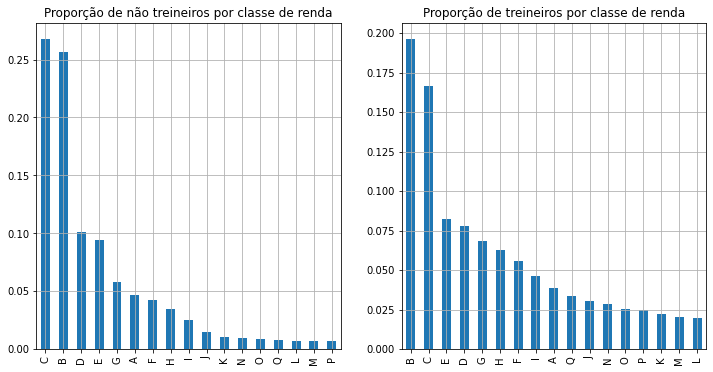

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
dados[dados['IN_TREINEIRO'] == 0]['Q006'].value_counts(normalize=True).plot.bar(grid=True)
plt.title('Proporção de não treineiros por classe de renda')
plt.subplot(1,2,2)
dados[dados['IN_TREINEIRO'] == 1]['Q006'].value_counts(normalize=True).plot.bar(grid=True)
plt.title('Proporção de treineiros por classe de renda')
plt.show()

### Desafio 06: Fazer o mesmo boxplot olhando a questão 25 (tem internet em casa ou não) e fazer uma reflexão sobre o assunto e o contexto da pandemia.

A = Não tem acesso a internet<br>
B = Tem acesso a internet

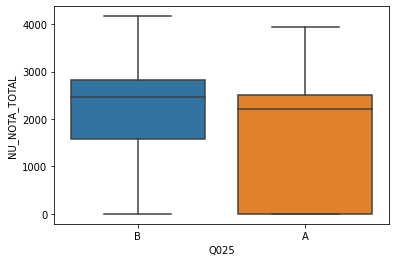

In [ ]:
sns.boxplot(data=dados, x='Q025', y='NU_NOTA_TOTAL')

In [ ]:
print('Média do total de notas de pessoas sem acesso a intenet:',dados[dados['Q025'] == 'A']['NU_NOTA_TOTAL'].mean())
print('Média do total de notas de pessoas com acesso a intenet:',dados[dados['Q025'] == 'B']['NU_NOTA_TOTAL'].mean())
print('Diferença das médias:', abs(dados[dados['Q025'] == 'A']['NU_NOTA_TOTAL'].mean() - dados[dados['Q025'] == 'B']['NU_NOTA_TOTAL'].mean()))

Média do total de notas de pessoas sem acesso a intenet: 1708.5152551859248
Média do total de notas de pessoas com acesso a intenet: 2033.2164758636698
Diferença das médias: 324.7012206777449


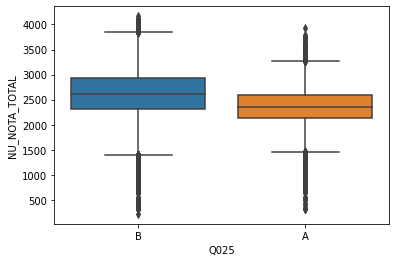

In [ ]:
sns.boxplot(data=dados_sem_notas_zero, x='Q025', y='NU_NOTA_TOTAL')

In [ ]:
print('Média do total de notas de pessoas sem acesso a intenet:',dados_sem_notas_zero[dados_sem_notas_zero['Q025'] == 'A']['NU_NOTA_TOTAL'].mean())
print('Média do total de notas de pessoas com acesso a intenet:',dados_sem_notas_zero[dados_sem_notas_zero['Q025'] == 'B']['NU_NOTA_TOTAL'].mean())
print('Diferença das médias:', abs(dados_sem_notas_zero[dados_sem_notas_zero['Q025'] == 'A']['NU_NOTA_TOTAL'].mean() - dados_sem_notas_zero[dados_sem_notas_zero['Q025'] == 'B']['NU_NOTA_TOTAL'].mean()))

Média do total de notas de pessoas sem acesso a intenet: 2329.215775668846
Média do total de notas de pessoas com acesso a intenet: 2600.260913409876
Diferença das médias: 271.04513774103


### Desafio Extra 01: Média de todas as provas por tipo de escola do ensino médio ('TP_ESCOLA').

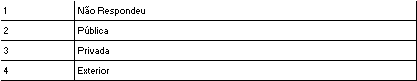

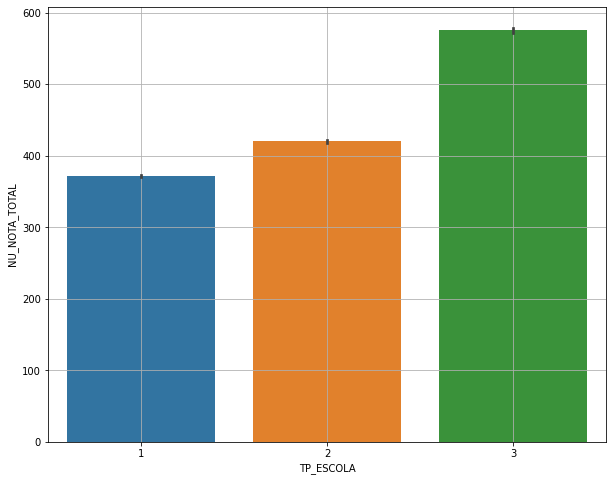

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(data=dados, x='TP_ESCOLA', y=dados['NU_NOTA_TOTAL']/5)
plt.grid()
plt.show()